In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()  # mode interactif facilite utilisation figures multiples

# fixer la graine aléatoire de numpy permet d'obtenir systématiquement les mêmes résultats
np.random.seed(150)

# définir matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])
# générer données classe 1
c1d = (np.random.randn(100,2)).dot(sca).dot(rot)

# générer données classe 2
c2d1 = np.random.randn(25,2)+[-10, 2]
c2d2 = np.random.randn(25,2)+[-7, -2]
c2d3 = np.random.randn(25,2)+[-2, -6]
c2d4 = np.random.randn(25,2)+[5, -7]

data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

# générer étiquettes de classe
l1c = np.ones(100, dtype=int)
l2c = np.zeros(100, dtype=int)
labels = np.concatenate((l1c, l2c))

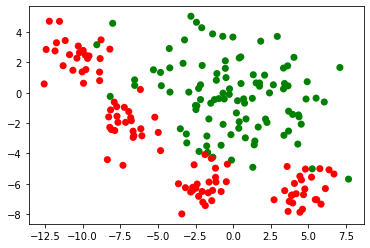

In [2]:
# les échantillons du premier groupe sont en rouge 'r', ceux du deuxième groupe en vert (*green*) 'g'
cmp = np.array(['r','g'])
plt.figure()
plt.scatter(data[:,0],data[:,1], c=cmp[labels], s=50, edgecolors='none')

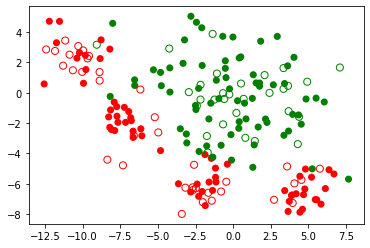

In [3]:
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.33)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# évaluation et affichage sur split1
lda.fit(X_train1, y_train1)
print("Le score sur le jeu d'apprentissage est de : {}".format(lda.score(X_train1, y_train1)))

print("Le score sur le jeu de test est de : {}".format(lda.score(X_test1, y_test1)))

Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu de test est de : 0.9393939393939394


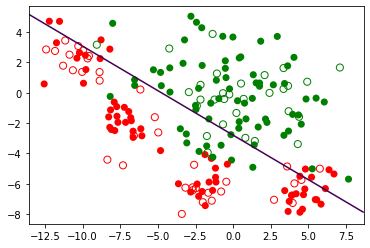

In [5]:
# on créé une nouvelle figure sur laquelle on affiche les points
plt.figure()
plt.scatter(X_train1[:,0], X_train1[:,1], c=cmp[y_train1], s=50, edgecolors='none')
plt.scatter(X_test1[:,0], X_test1[:,1], c='none', s=50, edgecolors=cmp[y_test1])

# on calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# on dessine la frontière correspond à une probabilité de 0,5
plt.contour(xx, yy, Z, [0.5])

In [9]:
for decoupage in range(10):
    X_trainv, X_testv, y_trainv, y_testv = train_test_split(data, labels, test_size=0.33)
    ldav = LinearDiscriminantAnalysis()
    ldav.fit(X_trainv, y_trainv)
    ldav.score(X_testv, y_testv)
    print("Le score sur le jeu d'apprentissage est de : {}".format(lda.score(X_train1, y_train1)))

print("Le score sur le jeu de test est de : {}".format(lda.score(X_test1, y_test1)))

Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu de test est de : 0.9393939393939394


In [10]:
#Perceptron multicouche
from sklearn.neural_network import MLPClassifier
# nous utilisons ici l'algorithme L-BFGS pour optimiser le perceptron
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)

# évaluation et affichage sur split1
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1)
print("Le score en train est {}".format(train_score))

test_score = clf.score(X_test1, y_test1)
print("Le score en test est {}".format(test_score))

Le score en train est 1.0
Le score en test est 0.9242424242424242


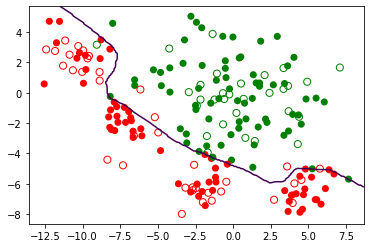

In [11]:
# créer une nouvelle figure
plt.figure()
# afficher les nuages de points apprentissage (remplis) et de test (vides)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

# calculer la probabilité de sortie du perceptron pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# dessiner le contour correspondant à la frontière proba = 0,5
plt.contour(xx, yy, Z, [0.5])

Le score en train est 0.9626865671641791
Le score en test est 0.9242424242424242


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


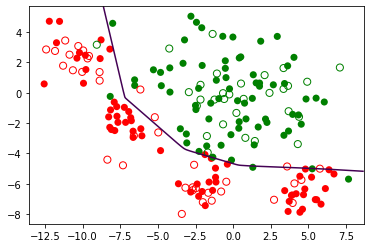

In [12]:
#Perceptron multicouche
from sklearn.neural_network import MLPClassifier
# nous utilisons ici l'algorithme L-BFGS pour optimiser le perceptron
clf = MLPClassifier(solver='lbfgs', alpha=1)

# évaluation et affichage sur split1
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1)
print("Le score en train est {}".format(train_score))

test_score = clf.score(X_test1, y_test1)
print("Le score en test est {}".format(test_score))
# créer une nouvelle figure
plt.figure()
# afficher les nuages de points apprentissage (remplis) et de test (vides)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

# calculer la probabilité de sortie du perceptron pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# dessiner le contour correspondant à la frontière proba = 0,5
plt.contour(xx, yy, Z, [0.5])

In [17]:
# Régression avec modèles linéaires et PMC
# définir matrices de rotation et de dilatation
rot = np.array([[0.94, 0.34], [-0.34, 0.94]])
sca = np.array([[10, 0], [0, 1]])
# générer données bidimensionnelles
np.random.seed(60)
rd = np.random.randn(60,2)
datar = rd.dot(sca).dot(rot)

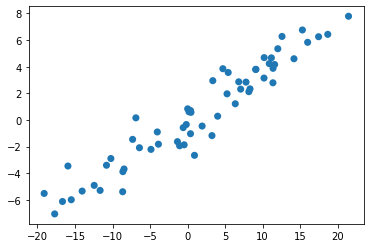

In [18]:
plt.figure()
plt.scatter(datar[:,0],datar[:,1],s=50,edgecolors='none')

20
20
40
40


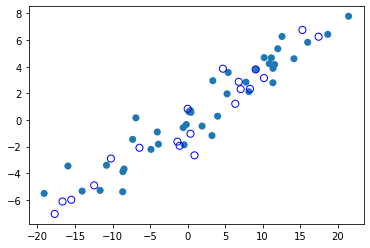

In [28]:
# Apprentissage se fait avec la méthode train_test_split
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
print(X_test1.size)
print(y_test1.size)
print(X_train1.size)
print(y_train1.size)
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')

In [27]:
# Pour effectuer une regression lineaire utiliser la classe linear_model et la méthode .LinearRegression  
from sklearn import linear_model
reg = linear_model.LinearRegression()

# évaluation et affichage sur split1
reg.fit(X_train1.reshape(-1,1), y_train1)
# attention, score() ici ne renvoie pas l'erreur mais la valeur du coefficient de détermination R² !
coeff_train = reg.score(X_train1.reshape(-1,1), y_train1)
print("Coefficient de détermination R² en train : {}".format(coeff_train))

coeff_test = reg.score(X_test1.reshape(-1,1), y_test1)
print("Coefficient de détermination R² en test : {}".format(coeff_train))

Coefficient de détermination R² en train : 0.9154288577915851
Coefficient de détermination R² en test : 0.9154288577915851


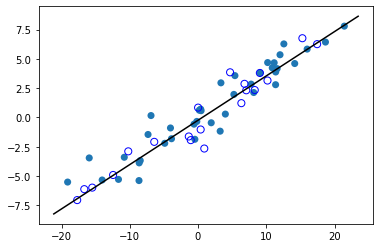

In [29]:
plt.figure()
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg.predict(xx.reshape(-1,1)),color='black')

In [52]:
# erreur quadratique 1/n Somme de i = 1 à n de (X - y)**2
from scipy import linalg
print(linalg.norm(reg.predict(X_train1.reshape(-1, 1)) - y_train1) ** 2 / len(y_train1))
print(linalg.norm(reg.predict(X_test1.reshape(-1, 1)) - y_test1) ** 2 / len(y_test1))


1.3772874146465244
1.153041945028359


In [53]:
# Ou avec la méthode mean_suared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(reg.predict(X_test1.reshape(-1, 1)), y_test1)


1.153041945028359

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg.predict(X_train1.reshape(-1, 1)), y_train1)

1.3772874146465246

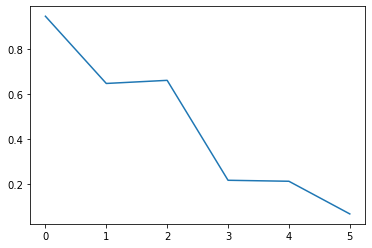

In [60]:
# Attention, comme pour les données initiales, 
# vous devez appliquer d’abord la dilatation
# (.dot(sca)) et ensuite la rotation (.dot(rot)).
coefdet = []
for et2 in range (1, 7):
    sca = np.array([[10, 0], [0, et2]])
    datar = rd.dot(sca).dot(rot)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
    reg = linear_model.LinearRegression()
    reg.fit(X_train1.reshape(-1,1), y_train1)
    coefdet.append(reg.score(X_test1.reshape(-1,1), y_test1))
plt.figure()
plt.plot(coefdet)

In [77]:
#alpha étant le terme de régularisation
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1)

# évaluation et affichage sur split1
clf.fit(X_train1.reshape(-1,1), y_train1)
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1)
print("Le coefficient R² de train est {}".format(coeff_train))
coeff_test = clf.score(X_test1.reshape(-1,1), y_test1)
print("Le coefficient R² de test est {}".format(coeff_train))

Le coefficient R² de train est 0.25270091054068844
Le coefficient R² de test est 0.25270091054068844


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


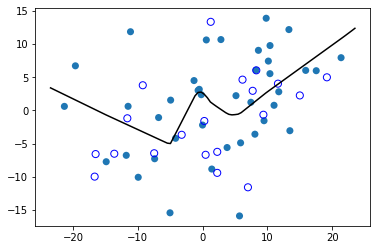

In [78]:
plt.figure()
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue')
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')